# Contents:

I. [Loading the Data:](#Loading-the-Data:)

II. [Helper function to calculate prediction interval:](#Helper-function-to-calculate-prediction-interval:)

III. [Models:](#Models:)

* [Linear Regression:](#Linear-Regression:)

* [Ridge Regression:](#Ridge-Regression:)

* [Lasso Regression:](#Lasso-Regression:)

* [Ensemble:](#Ensemble:)

IV. [Saving the final trained model:](#Saving-the-final-trained-model:)

## Loading the Data:

([Contents:](#Contents:))

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/real_estate_model_ready.csv')
print(df.shape)
df.head()

(199, 33)


,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned,Price by sub-area,Amenities score,Price by Amenities score,Noun_Counts,Verb_Counts,Adjective_Counts,boasts elegant,elegant towers,every day,great community,mantra gold,offering bedroom,quality specification,stories offering,towers stories,world class
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located suburbs ba...,1,1,1,1,1,1,1,670.0,51.5,62.897000,7,74.75,9,1,3,0,0,0,0,0,0,0,0,0,0
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near lonavala hill ran...,1,1,1,1,1,1,1,774.0,65.0,62.897000,7,74.75,9,1,3,0,0,0,0,0,0,0,0,0,0
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society suitable aged group people play...,1,1,1,1,1,1,1,889.0,74.0,62.897000,7,74.75,9,1,3,0,0,0,0,0,0,0,0,0,0
3,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha township offering bhk grand prpoerties ...,1,1,1,1,1,1,1,1018.0,89.0,62.897000,7,74.75,8,1,3,0,0,0,0,0,0,0,0,0,0
4,pune,maharashtra,india,2.0,mahalunge,godrej properties,godrej hills retreat,area hub prestigious schools like bishop high ...,1,1,1,1,1,1,1,743.0,74.0,74.833333,7,74.75,12,1,6,0,0,0,0,0,0,0,0,0,0


In [3]:
# Selecting only numerical features
cols_to_drop = ['City','State','Country','Sub-Area Cleaned','TownShip Name/ Society Name Cleaned',
                'Description Cleaned','Company Name Cleaned']

features = df.drop(cols_to_drop,axis=1).columns.tolist()
print("Final number of features: "+str(len(features)))

Final number of features: 26


In [80]:
features

['Property Type Cleaned',
 'ClubHouse Cleaned',
 'School / University in Township Cleaned',
 'Hospital in TownShip Cleaned',
 'Mall in TownShip Cleaned',
 'Park / Jogging track Cleaned',
 'Swimming Pool Cleaned',
 'Gym Cleaned',
 'Property Area in Sq. Ft. Cleaned',
 'Price in lakhs Cleaned',
 'Price by sub-area',
 'Amenities score',
 'Price by Amenities score',
 'Noun_Counts',
 'Verb_Counts',
 'Adjective_Counts',
 'boasts elegant',
 'elegant towers',
 'every day',
 'great community',
 'mantra gold',
 'offering bedroom',
 'quality specification',
 'stories offering',
 'towers stories',
 'world class']

In [109]:
featuresMod = ['PropertyType',
                'ClubHouse',
                'School_University_in_Township',
                'Hospital_in_TownShip',
                'Mall_in_TownShip',
                'Park_Jogging_track',
                'Swimming_Pool',
                'Gym',
                'Property_Area_in_Sq_Ft',
                'Price_in_lakhs',
                'Price_by_sub_area',
                'Amenities_score',
                'Price_by_Amenities_score',
                'Noun_Counts',
                'Verb_Counts',
                'Adjective_Counts',
                'boasts_elegant',
                'elegant_towers',
                'every_day',
                'great_community',
                'mantra_gold',
                'offering_bedroom',
                'quality_specification',
                'stories_offering',
                'towers_stories',
                'world_class']
print(len(featuresMod))

26


In [113]:
df_features = df[features]
df_features.columns = featuresMod
print(df_features.shape)
df_features.head()

(199, 26)


,PropertyType,ClubHouse,School_University_in_Township,Hospital_in_TownShip,Mall_in_TownShip,Park_Jogging_track,Swimming_Pool,Gym,Property_Area_in_Sq_Ft,Price_in_lakhs,Price_by_sub_area,Amenities_score,Price_by_Amenities_score,Noun_Counts,Verb_Counts,Adjective_Counts,boasts_elegant,elegant_towers,every_day,great_community,mantra_gold,offering_bedroom,quality_specification,stories_offering,towers_stories,world_class
0,1.0,1,1,1,1,1,1,1,670.0,51.5,62.897000,7,74.75,9,1,3,0,0,0,0,0,0,0,0,0,0
1,2.0,1,1,1,1,1,1,1,774.0,65.0,62.897000,7,74.75,9,1,3,0,0,0,0,0,0,0,0,0,0
2,3.0,1,1,1,1,1,1,1,889.0,74.0,62.897000,7,74.75,9,1,3,0,0,0,0,0,0,0,0,0,0
3,3.0,1,1,1,1,1,1,1,1018.0,89.0,62.897000,7,74.75,8,1,3,0,0,0,0,0,0,0,0,0,0
4,2.0,1,1,1,1,1,1,1,743.0,74.0,74.833333,7,74.75,12,1,6,0,0,0,0,0,0,0,0,0,0


In [115]:
# IDV and DV
X = df_features.drop('Price_in_lakhs',axis=1)
y = df_features[['Price_in_lakhs']]

print(X.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)
print((x_train.shape, x_test.shape), (y_train.shape,y_test.shape))

(199, 25)
(199, 1)
((139, 25), (60, 25)) ((139, 1), (60, 1))


## Helper function to calculate prediction interval:

([Contents:](#Contents:))

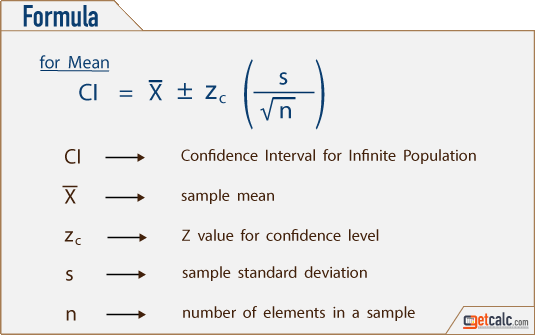

In [116]:
def get_interval_estimate(actual_values, predicted_values, pi=.95):
    '''
    Get the interval estimate for a linear regression model.
    
    INPUTS: 
        - y_train
        - prediction from x_train,
        - Prediction interval threshold (default = .95) 
    OUTPUT: 
        - Interval estimate
    '''
    
    #get standard deviation of prediction on the train dataset
    sum_errs = np.sum((actual_values - predicted_values)**2)
    stdev = np.sqrt(sum_errs / (len(actual_values) - 1))
    
    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev

    return interval


def get_prediction_interval(prediction, actual_values, predicted_values, pi=.95):
    '''
    Get a prediction interval for a linear regression model.
    
    INPUTS: 
        - Single prediction (test data), 
        - y_train
        - prediction from x_train,
        - Prediction interval threshold (default = .95) 
    OUTPUT: 
        - Prediction interval for single test prediction
    '''
    
    #get standard deviation of prediction on the train dataset
    sum_errs = np.sum((actual_values - predicted_values)**2)
    stdev = np.sqrt(sum_errs / (len(actual_values) - 1))
    
    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
    
    
    #generate prediction interval lower and upper bound cs_24
    lower, upper = prediction - interval, prediction + interval
    return lower[0], upper[0]

## Models:

### Linear Regression:

([Contents:](#Contents:))

In [117]:
# Model training
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
print("Training R2 score: "+ str(linear_reg.score(x_train,y_train)))

Training R2 score: 0.8601049466092403


In [118]:
# Predicting on the test and evaluating the accuracy
preds_lr = linear_reg.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_lr)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_lr)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_lr))))

Test R2 score: 0.8918845502505847
Test MAE: 9.831982607144166
Test RMSE: 12.942632445045726


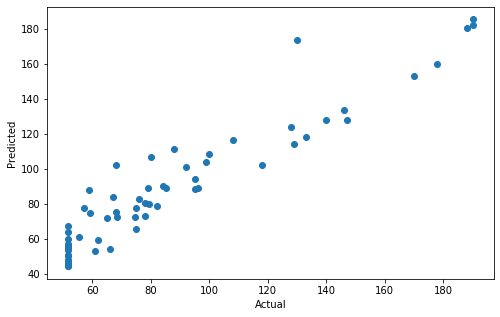

In [119]:
# Plotting the predicted and actual data 
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_lr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [120]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_lr:
    lower, upper =  get_prediction_interval(i, y_train.values, linear_reg.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [121]:
print(lower_vet[:5])
print(upper_vet[:5])

[62.65044731122027, 69.47906073932216, 51.11142870182142, 92.48705655710125, 34.199278696278505]
[125.6911637314644, 132.5197771595663, 114.15214512206555, 155.5277729773454, 97.23999511652264]


In [122]:
preds_lr.reshape(-1)

array([ 94.17080552, 100.99941895,  82.63178691, 124.00741477,
        65.71963691,  90.42541857,  88.43531882, 108.69952847,
        50.21350084,  55.70478694,  83.80729815,  54.25417468,
       118.37076069, 173.30048505,  73.18946242,  44.29266532,
       103.70654727,  72.09595102,  50.93143992,  78.92439063,
        48.0534305 , 114.31721186,  74.75715439,  56.94041785,
       152.73588395,  53.79825942, 111.57055869, 133.42614299,
        47.13674172,  77.39886289,  77.45224114,  45.63960896,
        64.1645221 , 116.59733983,  75.20552358,  60.89128434,
       159.82242385, 182.05982469,  87.84821238,  59.2446386 ,
        72.52994352, 106.78605256,  55.01556345,  88.8206305 ,
        60.12039003,  44.72901446,  53.17237304, 101.92507344,
       127.73151917,  89.09906293,  80.34340933, 180.57744906,
        67.59911001,  46.40523442, 185.32786633, 102.33062832,
        80.08319482, 128.13073946,  72.2281903 ,  89.32994266])

In [123]:
df_lr = pd.DataFrame(zip(lower_vet,upper_vet,preds_lr.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_lr.shape)
df_lr.head()

(60, 3)


,lower,upper,mean
0,62.650447,125.691164,94.170806
1,69.479061,132.519777,100.999419
2,51.111429,114.152145,82.631787
3,92.487057,155.527773,124.007415
4,34.199279,97.239995,65.719637


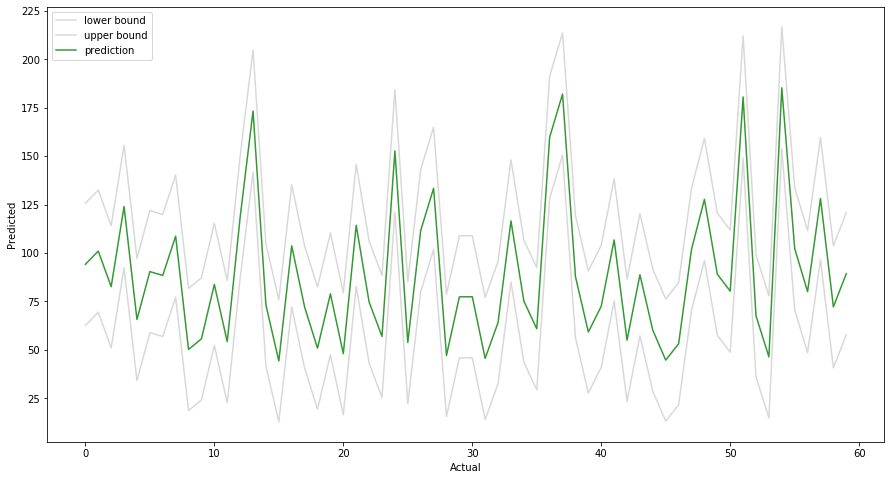

In [124]:
# Plotting the predicted and actual data 
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_lr,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

### Ridge Regression:

([Contents:](#Contents:))

In [125]:
# Model training
ridge = Ridge()
ridge.fit(x_train,y_train)
print("Training R2 score: "+ str(ridge.score(x_train,y_train)))

Training R2 score: 0.8589826704476355


In [126]:
# Predicting on the test and evaluating the accuracy
preds_rid = ridge.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_rid)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_rid)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_rid))))

Test R2 score: 0.8957756531572729
Test MAE: 9.611112958708553
Test RMSE: 12.70759395391315


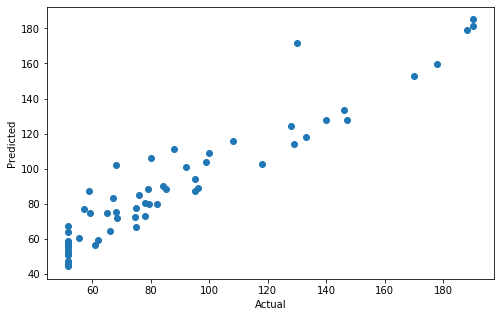

In [127]:
# Plotting the predicted and actual data 
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_rid)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [128]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_rid:
    lower, upper =  get_prediction_interval(i, y_train.values, ridge.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [129]:
print(lower_vet[:5])
print(upper_vet[:5])

[62.28917449500756, 69.2707627555649, 53.64123461103247, 92.56376842687632, 35.29863395156863]
[125.58225068685178, 132.56383894740912, 116.9343108028767, 155.85684461872054, 98.59171014341285]


In [130]:
preds_rid.reshape(-1)

array([ 93.93571259, 100.91730085,  85.28777271, 124.21030652,
        66.94517205,  89.96622171,  87.26549064, 108.79085949,
        50.56718607,  55.18729439,  83.49577526,  64.24502684,
       118.19579919, 171.76004681,  73.07822912,  44.31877663,
       103.70378627,  74.78072203,  51.2130544 ,  79.91290877,
        58.66645824, 114.20081163,  74.47912972,  55.40189224,
       152.78137033,  53.24092013, 111.21133918, 133.40479722,
        47.52865327,  77.16639443,  77.89599068,  45.8991784 ,
        64.15023235, 115.99628824,  75.33613294,  60.76103895,
       159.6622562 , 181.49807116,  87.39886075,  59.25098256,
        72.50822513, 105.8839539 ,  55.51078372,  88.67103778,
        58.46440412,  44.94190776,  56.29003894, 102.59238204,
       127.50456579,  89.2932762 ,  80.66969252, 179.16998192,
        67.17113488,  57.16219978, 185.09846589, 102.14624075,
        79.86266753, 127.70573825,  72.19811986,  88.71045083])

In [131]:
df_rid = pd.DataFrame(zip(lower_vet,upper_vet,preds_rid.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_rid.shape)
df_rid.head()

(60, 3)


,lower,upper,mean
0,62.289174,125.582251,93.935713
1,69.270763,132.563839,100.917301
2,53.641235,116.934311,85.287773
3,92.563768,155.856845,124.210307
4,35.298634,98.591710,66.945172


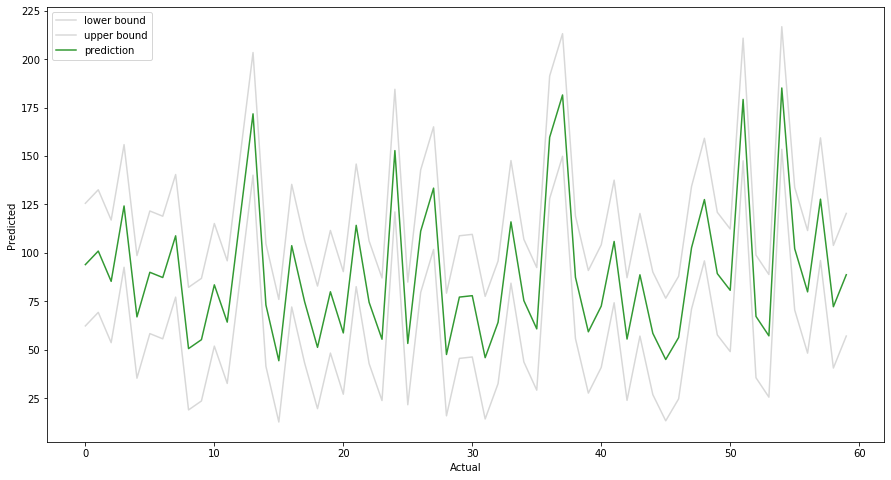

In [132]:
# Plotting the predicted and actual data 
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_rid,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

### Lasso Regression:

([Contents:](#Contents:))

In [133]:
# Model training
las = Lasso()
las.fit(x_train,y_train)
print("Training R2 score: "+ str(las.score(x_train,y_train)))

Training R2 score: 0.8429018756107678


In [134]:
# Predicting on the test and evaluating the accuracy
preds_las = ridge.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_las)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_las)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_las))))

Test R2 score: 0.8957756531572729
Test MAE: 9.611112958708553
Test RMSE: 12.70759395391315


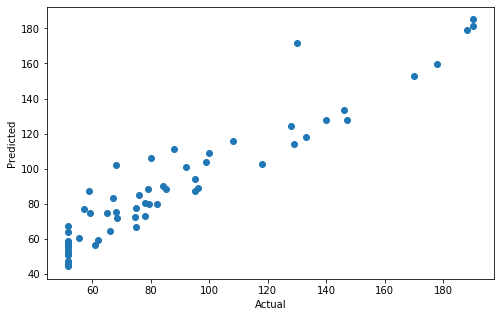

In [135]:
# Plotting the predicted and actual data 
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_las)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [136]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_las:
    lower, upper =  get_prediction_interval(i, y_train.values, las.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [137]:
print(lower_vet[:5])
print(upper_vet[:5])

[60.53348235980307, 67.5150706203604, 51.88554247582798, 90.80807629167182, 33.54294181636414]
[127.33794282205628, 134.31953108261362, 118.6900029380812, 157.61253675392504, 100.34740227861735]


In [138]:
preds_las.reshape(-1)

array([ 93.93571259, 100.91730085,  85.28777271, 124.21030652,
        66.94517205,  89.96622171,  87.26549064, 108.79085949,
        50.56718607,  55.18729439,  83.49577526,  64.24502684,
       118.19579919, 171.76004681,  73.07822912,  44.31877663,
       103.70378627,  74.78072203,  51.2130544 ,  79.91290877,
        58.66645824, 114.20081163,  74.47912972,  55.40189224,
       152.78137033,  53.24092013, 111.21133918, 133.40479722,
        47.52865327,  77.16639443,  77.89599068,  45.8991784 ,
        64.15023235, 115.99628824,  75.33613294,  60.76103895,
       159.6622562 , 181.49807116,  87.39886075,  59.25098256,
        72.50822513, 105.8839539 ,  55.51078372,  88.67103778,
        58.46440412,  44.94190776,  56.29003894, 102.59238204,
       127.50456579,  89.2932762 ,  80.66969252, 179.16998192,
        67.17113488,  57.16219978, 185.09846589, 102.14624075,
        79.86266753, 127.70573825,  72.19811986,  88.71045083])

In [139]:
df_las = pd.DataFrame(zip(lower_vet,upper_vet,preds_las.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_las.shape)
df_las.head()

(60, 3)


,lower,upper,mean
0,60.533482,127.337943,93.935713
1,67.515071,134.319531,100.917301
2,51.885542,118.690003,85.287773
3,90.808076,157.612537,124.210307
4,33.542942,100.347402,66.945172


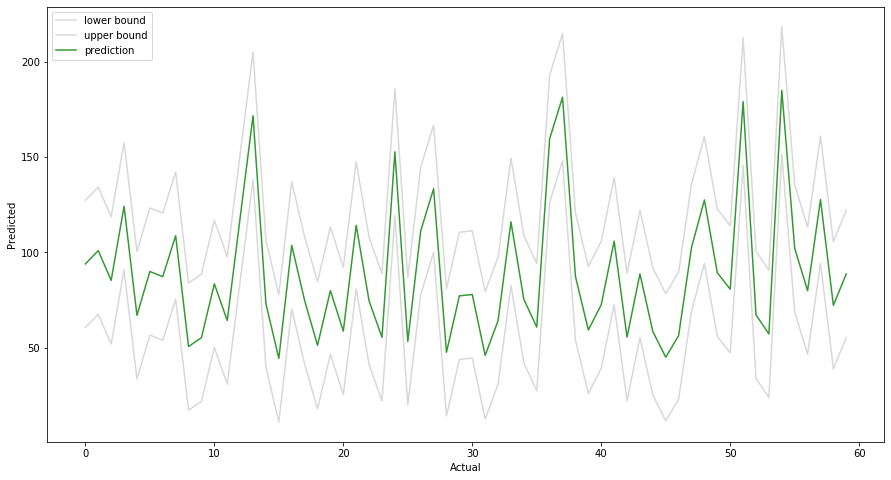

In [140]:
# Plotting the predicted and actual data 
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_las,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

## Ensemble:

([Contents:](#Contents:))

In [141]:
# Model training
from sklearn.ensemble import VotingRegressor

estimators = [('lr',linear_reg),('rid',ridge),('lasso',las)]
voting_ensemble = VotingRegressor(estimators,)
voting_ensemble.fit(x_train,y_train)
print("Training R2 score: "+ str(voting_ensemble.score(x_train,y_train)))

Training R2 score: 0.8573712880550022


In [142]:
# Predicting on the test and evaluating the accuracy
preds_vote = voting_ensemble.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_vote)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_vote)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_vote))))

Test R2 score: 0.9026061853165924
Test MAE: 9.172713148057566
Test RMSE: 12.284130641239525


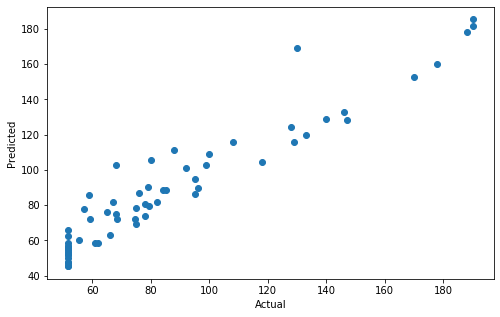

In [143]:
# Plotting the predicted and actual data 
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_vote)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [144]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_vote.reshape(-1,1):
    lower, upper =  get_prediction_interval(i, y_train.values, voting_ensemble.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [145]:
print(lower_vet[:5])
print(upper_vet[:5])

[62.75098470385112, 69.02722556230563, 55.14996549883965, 92.43199936190318, 37.67102425388342]
[126.40465362471696, 132.68089448317147, 118.80363441970549, 156.085668282769, 101.32469317474926]


In [146]:
preds_vote.reshape(-1)

array([ 94.57781916, 100.85406002,  86.97679996, 124.25883382,
        69.49785871,  88.57763104,  86.10344868, 109.18077509,
        50.15460332,  53.70323346,  81.92465719,  62.8436196 ,
       119.54391581, 169.3822749 ,  73.66539994,  45.28075941,
       102.76947661,  75.97724645,  51.66767375,  81.93510505,
        58.61718793, 115.73954346,  72.33546503,  54.39259617,
       152.9235517 ,  52.17717256, 111.41840094, 133.00244009,
        47.51138979,  77.58699265,  78.68262547,  46.97722845,
        62.66349364, 115.79623095,  74.89235776,  60.31717617,
       160.02984268, 181.48160731,  85.58843024,  58.60862127,
        72.10213311, 105.79071814,  55.94604927,  88.40542722,
        56.94826079,  45.56834961,  58.49948514, 104.2437017 ,
       128.55663384,  89.84881686,  80.6297288 , 177.90940161,
        65.86553716,  56.49181479, 185.33185289, 102.74783383,
        79.2533215 , 128.80990756,  72.34484032,  90.52981266])

In [147]:
df_vote = pd.DataFrame(zip(lower_vet,upper_vet,preds_vote.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_vote.shape)
df_vote.head()

(60, 3)


,lower,upper,mean
0,62.750985,126.404654,94.577819
1,69.027226,132.680894,100.854060
2,55.149965,118.803634,86.976800
3,92.431999,156.085668,124.258834
4,37.671024,101.324693,69.497859


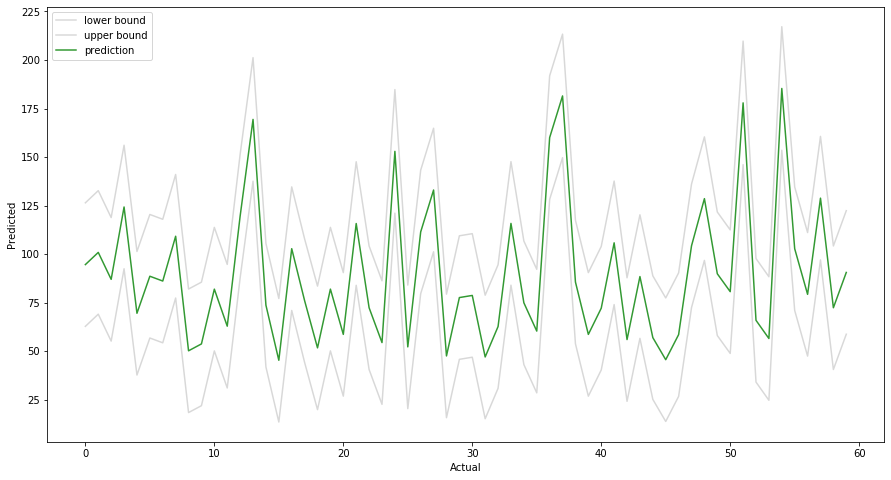

In [148]:
# Plotting the predicted and actual data 
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_vote,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

## Saving the final trained model:

([Contents:](#Contents:))

In [149]:
import joblib

fileName = 'model/property_price_prediction_voting.sav'
joblib.dump(voting_ensemble,fileName)

['model/property_price_prediction_voting.sav']

In [150]:
# load the model from disk
loaded_model = joblib.load(fileName)
print(loaded_model)

VotingRegressor(estimators=[('lr', LinearRegression()), ('rid', Ridge()),
                            ('lasso', Lasso())])


In [151]:
# features on which the model was trained
loaded_model.feature_names_in_

array(['PropertyType', 'ClubHouse', 'School_University_in_Township',
       'Hospital_in_TownShip', 'Mall_in_TownShip', 'Park_Jogging_track',
       'Swimming_Pool', 'Gym', 'Property_Area_in_Sq_Ft',
       'Price_by_sub_area', 'Amenities_score', 'Price_by_Amenities_score',
       'Noun_Counts', 'Verb_Counts', 'Adjective_Counts', 'boasts_elegant',
       'elegant_towers', 'every_day', 'great_community', 'mantra_gold',
       'offering_bedroom', 'quality_specification', 'stories_offering',
       'towers_stories', 'world_class'], dtype=object)

In [152]:
# testing it on the test data
result = loaded_model.score(x_test, y_test)
print(result)

0.9026061853165924


In [154]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("model/regressor.pkl","wb")
pickle.dump(voting_ensemble, pickle_out)
pickle_out.close()

In [177]:
voting_ensemble.predict(x_test.values[0].reshape(1,-1))

array([94.57781916])

In [176]:
x_test.values[0].reshape(1,-1).shape

(1, 25)

In [178]:
d = {'af': [12,13]}

In [83]:
type(d)

dict

In [86]:
dict(d)

{'af': 12}

In [99]:
# pd.DataFrame.from_dict(d,orient='columns',)
items = d.items()
pd.DataFrame({'keys': [i[0] for i in items], 'values': [i[1] for i in items]})

,keys,values
0,af,12


In [100]:
items

dict_items([('af', 12)])

In [103]:
pd.DataFrame([d])

,af
0,12


In [104]:
d = {'PropertyType': 0.0, 'ClubHouse': 0.0, 'School_University_in_Township': 0.0, 'Hospital_in_TownShip': 0.0, 'Mall_in_TownShip': 0.0, 'Park_Jogging_track': 0.0, 'Swimming_Pool': 0.0, 'Gym': 0.0, 'Property_Area_in_Sq_Ft': 0.0, 'Price_by_sub_area': 0.0, 'Amenities_score': 0.0, 'Price_by_Amenities_score': 0.0, 'Noun_Counts': 0.0, 'Verb_Counts': 0.0, 'Adjective_Counts': 0.0, 'boasts_elegant': 0.0, 'elegant_towers': 0.0, 'every_day': 0.0, 'great_community': 0.0, 'mantra_gold': 0.0, 'offering_bedroom': 0.0, 'quality_specification': 0.0, 'stories_offering': 0.0, 'towers_stories': 0.0, 'world_class': 0.0}

In [179]:
pd.DataFrame([d])

,af
0,"[12, 13]"
